In [34]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings 
warnings.filterwarnings("ignore")

In [4]:
#importing dataset of zomato
df=pd.read_excel("zomato-2.xlsx")

In [77]:
print(df.to_string())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [78]:
df

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Bar,,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.7,0,Bar,,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.7,0,Bar,,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [7]:
df.shape

(51717, 17)

In [8]:
df.describe()

,votes,approx_cost(for two people)
count,51717.000000,51371.000000
mean,283.697527,555.431566
std,803.838853,438.850728
min,0.000000,40.000000
25%,7.000000,300.000000
50%,41.000000,400.000000
75%,198.000000,650.000000
max,16832.000000,6000.000000


In [9]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          12903
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22456
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [10]:
#Removing the Unnecessary columns in dataset
df.drop(["url","address","phone","reviews_list","menu_item","location"],inplace=True,axis=1)

In [11]:
df

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Bar,NaN,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Bar,NaN,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,NaN,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         43942 non-null  object 
 4   votes                        51717 non-null  int64  
 5   rest_type                    51490 non-null  object 
 6   dish_liked                   23639 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  float64
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [13]:
df.shape

(51717, 11)

In [14]:
df.duplicated().sum()

124

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         43942 non-null  object 
 4   votes                        51717 non-null  int64  
 5   rest_type                    51490 non-null  object 
 6   dish_liked                   23639 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  float64
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [20]:
df.head(15)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8/5,286,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet,Banashankari
7,Onesta,Yes,Yes,4.6/5,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0/5,324,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,Cafes,Banashankari
9,Smacznego,Yes,No,4.2/5,504,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes,Banashankari


In [21]:
df.tail(25)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
51692,Amoeba Sports Bar,Yes,Yes,3.9 /5,578,"Lounge, Bar","Pasta, Fish, Beer, Chicken Wings, Mocktails, G...","Continental, Chinese",1000.0,Pubs and bars,Whitefield
51693,One For The Road,Yes,Yes,4.1 /5,137,Bar,"Cocktails, Pasta, Fish","Continental, North Indian, Finger Food",1200.0,Pubs and bars,Whitefield
51694,Whitefield Social,Yes,No,4.1 /5,2773,Pub,"Cocktails, Chicken Kebab, Murgh Ghee Roast, Vi...","American, North Indian, Chinese, Finger Food, ...",1500.0,Pubs and bars,Whitefield
51695,The Whitefield Arms Pub & Microbrewery,Yes,Yes,4.2 /5,1113,"Pub, Microbrewery","Beer, Chicken Tikka, Cosmopolitan, Burgers, Co...","British, Continental, BBQ",1600.0,Pubs and bars,Whitefield
51696,The Irish House,No,Yes,4.3 /5,1776,"Casual Dining, Pub","Beer, Cocktails, Burgers, Chicken Nachos, Mock...","European, American",1700.0,Pubs and bars,Whitefield
51697,Shizusan Shophouse & Bar,Yes,Yes,4.4 /5,1313,"Casual Dining, Bar","California Roll, Cocktails, Mocktails, Maki Ro...","Asian, Japanese, Vietnamese, Korean, Chinese, ...",1800.0,Pubs and bars,Whitefield
51698,Kava Kitchen & Bar - Fairfield by Marriott,No,No,3.9 /5,74,"Casual Dining, Bar",Dal Halwa,"North Indian, South Indian, Continental, Ameri...",1200.0,Pubs and bars,Whitefield
51699,Harry's Bar + Cafe,Yes,Yes,4.1 /5,1218,Pub,"Cocktails, Beer, Long Island Iced Tea, Pasta, ...","Asian, American, Mexican",1200.0,Pubs and bars,Whitefield
51700,BAR BAR,No,Yes,4.1 /5,1003,"Bar, Casual Dining","Mocktails, Cocktails, Pizza, Chicken Tikka, Na...","Continental, North Indian, Italian",1500.0,Pubs and bars,Whitefield
51701,The Beer Cafe,Yes,Yes,4.1 /5,673,Pub,"Cocktails, Wheat Beer, Bruschettas, Pasta, Bur...","Finger Food, North Indian, Chinese, Italian",1400.0,Pubs and bars,Whitefield


# Step No 1 Cleaning Name column 

In [16]:
df["name"].isnull().sum()

0

In [19]:
df["name"].dtype

dtype('O')

In [17]:
df["name"].iloc[10]

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [31]:
#creating user defined function to clean  name of resturant.
import re
def rest_names(names):
    if re.findall(r"[a-zA-Z0-9 ]",names):
        str_name1=re.findall(r"[a-zA-Z0-9 ]",names)
        str_name2="".join(str_name1)
        return str_name2
    else:
        return names

In [32]:
df["name"]=df["name"].apply(rest_names)

TypeError: expected string or bytes-like object, got 'int'

In [24]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Step 2 Cleaning Of Rate Column 

In [27]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [28]:
df["rate"].nunique()

64

In [29]:
df["rate"].isnull().sum()

7775

In [35]:
#creating a function to replace 'new' and '-' with null values .
#also convert values from rate col from object to float datatype.
def rest_rate(rates):
    if(rates=="NEW" or rates=="-"):
        return np.nan
    else:
        rate_sp=float(str(rates).split("/")[0])
        return rate_sp

In [36]:
df["rate"]=df["rate"].apply(rest_rate)

In [37]:
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [38]:
#fill nan values with mean of rate column.
df["rate"].fillna(df["rate"].mean(),inplace=True)

In [39]:
df["rate"]

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700449
51714    3.700449
51715    4.300000
51716    3.400000
Name: rate, Length: 51717, dtype: float64

In [40]:
#created a lambda function to round numbers after decimal in rate column for easy to understand.
round_rate=lambda x:round(x,2)

In [41]:
df["rate"]

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700449
51714    3.700449
51715    4.300000
51716    3.400000
Name: rate, Length: 51717, dtype: float64

In [42]:
df["rate"]=df["rate"].apply(round_rate)

In [43]:
df["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [44]:
df["rate"].isnull().sum()

0

In [45]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Step 3 Cleaning the cost Column 

In [48]:
df["approx_cost(for two people)"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [49]:
#creating user defined fucntion to remove comma from cost and convert to float value.
def rest_cost(costs):
    costs=str(costs)
    if "," in costs:
        num_sp=costs.split(",")
        #print(num_sp)
        num_jo="".join(num_sp)
        #print(num_jo)
        num_flo=float(num_jo)
        return num_flo
    else:
        num_floco=float(costs)
        return num_floco

In [50]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].apply(rest_cost)

In [51]:
# fill null values with mean value fo cost column.
df["approx_cost(for two people)"].fillna(df["approx_cost(for two people)"].mean(),inplace=True)

In [52]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)        0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


# Step 4 Cleaning Restraunt Column

In [53]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [54]:
df["rest_type"].nunique()

93

In [55]:
#replace null values with "" in type column.
df["rest_type"]=df["rest_type"].replace(np.nan,'')

In [56]:
df["rest_type"].isnull().sum()

0

In [57]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                          0
dish_liked                     28078
cuisines                          45
approx_cost(for two people)        0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [58]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', '', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
       

In [59]:
df["rest_type"][df["rest_type"]=='']

999       
1300      
1376      
1565      
1637      
        ..
50978     
51130     
51195     
51294     
51303     
Name: rest_type, Length: 227, dtype: object

In [62]:
df["rest_type"]

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51717, dtype: object

# Step 5 cleaning cuisines column

In [63]:
df["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [64]:
df["cuisines"].nunique()

2723

In [65]:
df["cuisines"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: cuisines, Length: 51717, dtype: bool

In [66]:
#replace null values with "".
df["cuisines"]=df["cuisines"].replace(np.nan,'')

In [70]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                          0
dish_liked                     28078
cuisines                           0
approx_cost(for two people)        0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Step  6 cleaning dish liked  column

In [71]:
df["dish_liked"].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [72]:
df["dish_liked"].nunique()

5271

In [75]:
df["dish_liked"].value_counts()

                                                                                                     28078
Biryani                                                                                                182
Chicken Biryani                                                                                         73
Friendly Staff                                                                                          69
Waffles                                                                                                 68
                                                                                                     ...  
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani        1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                     1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri Chicken Salad, Potato Wedges, Rolls               1
Chaat, Pav Bhaji, Raj Kachori, Butter

In [73]:
#replacing null values with "".
df["dish_liked"]=df["dish_liked"].replace(np.nan,"")

In [74]:
df["dish_liked"].isna().sum()

0

In [76]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# Data visualization (Graphs,piechart,etc)

In [79]:
high_vote=df.groupby("name")[["votes"]].mean().sort_values(by="votes",ascending=False).head(10).reset_index()

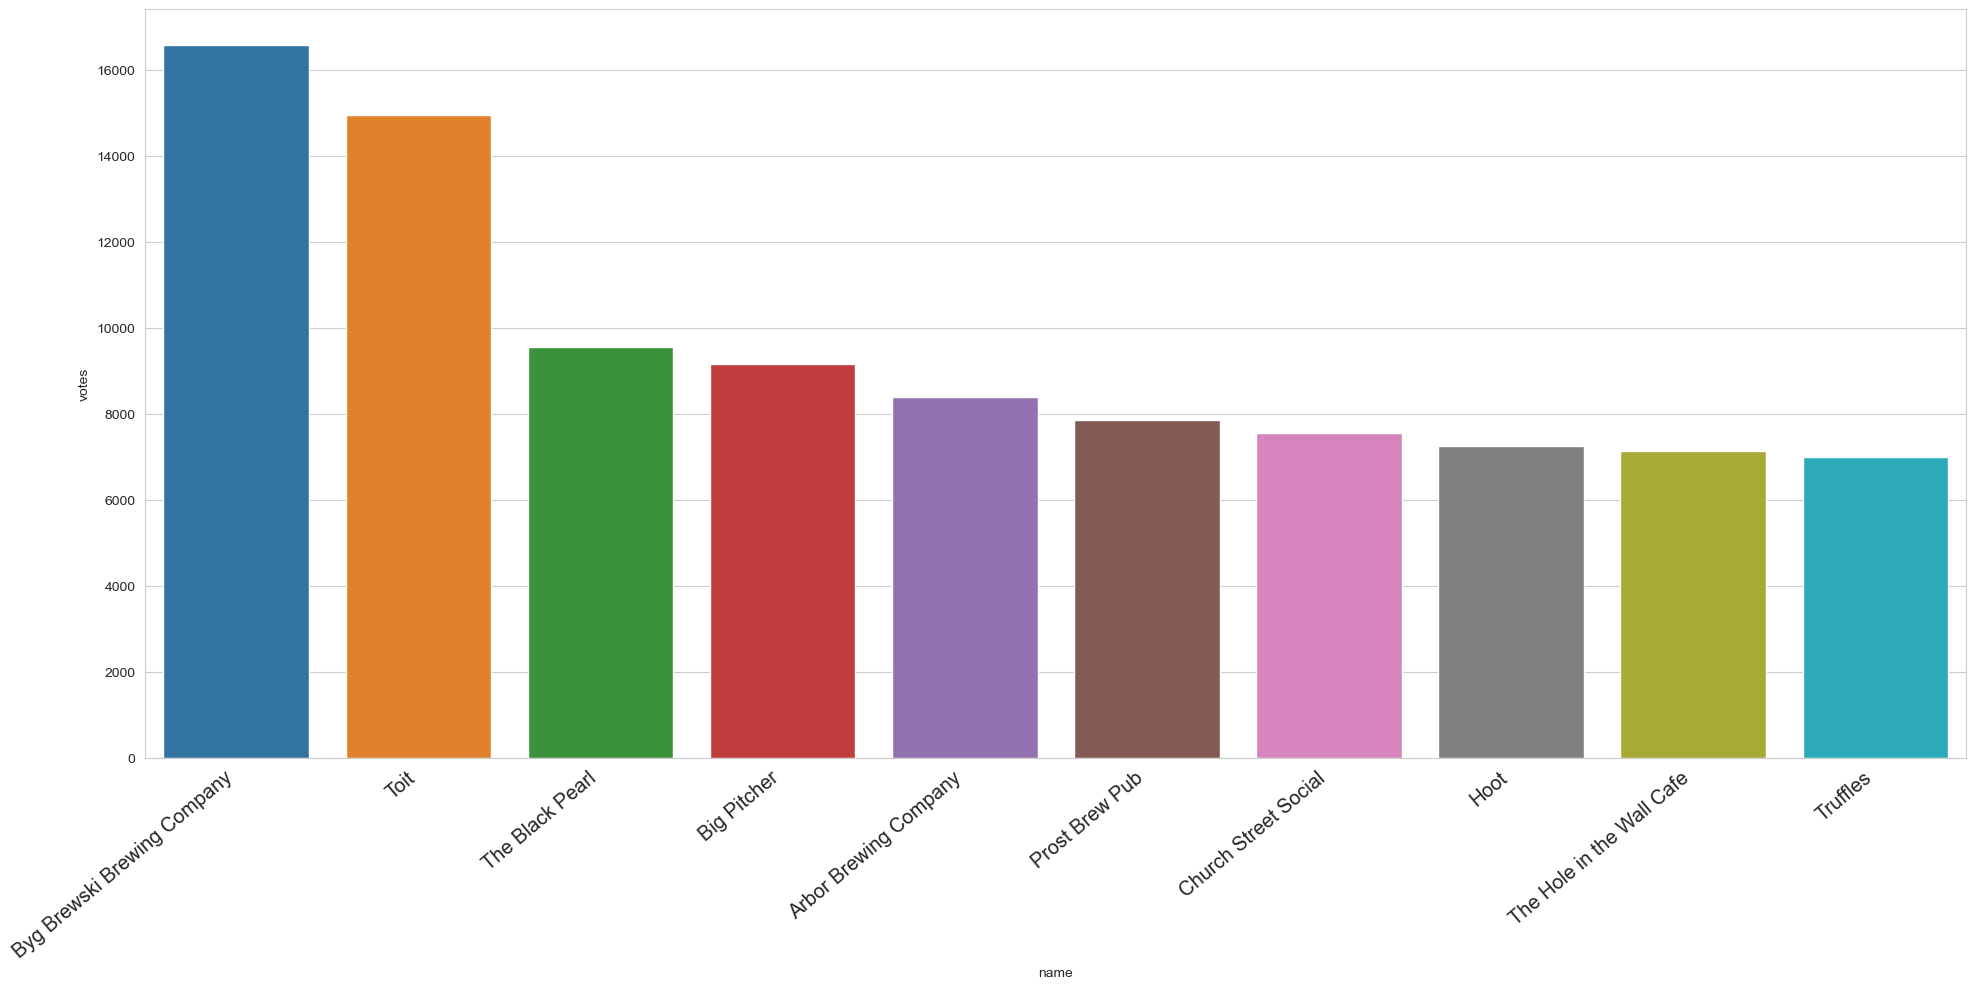

In [80]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="name",y="votes",data=high_vote)
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

In [81]:
high_rate=df.groupby("name")[["rate"]].mean().sort_values(by="rate",ascending=False).head(10).reset_index()

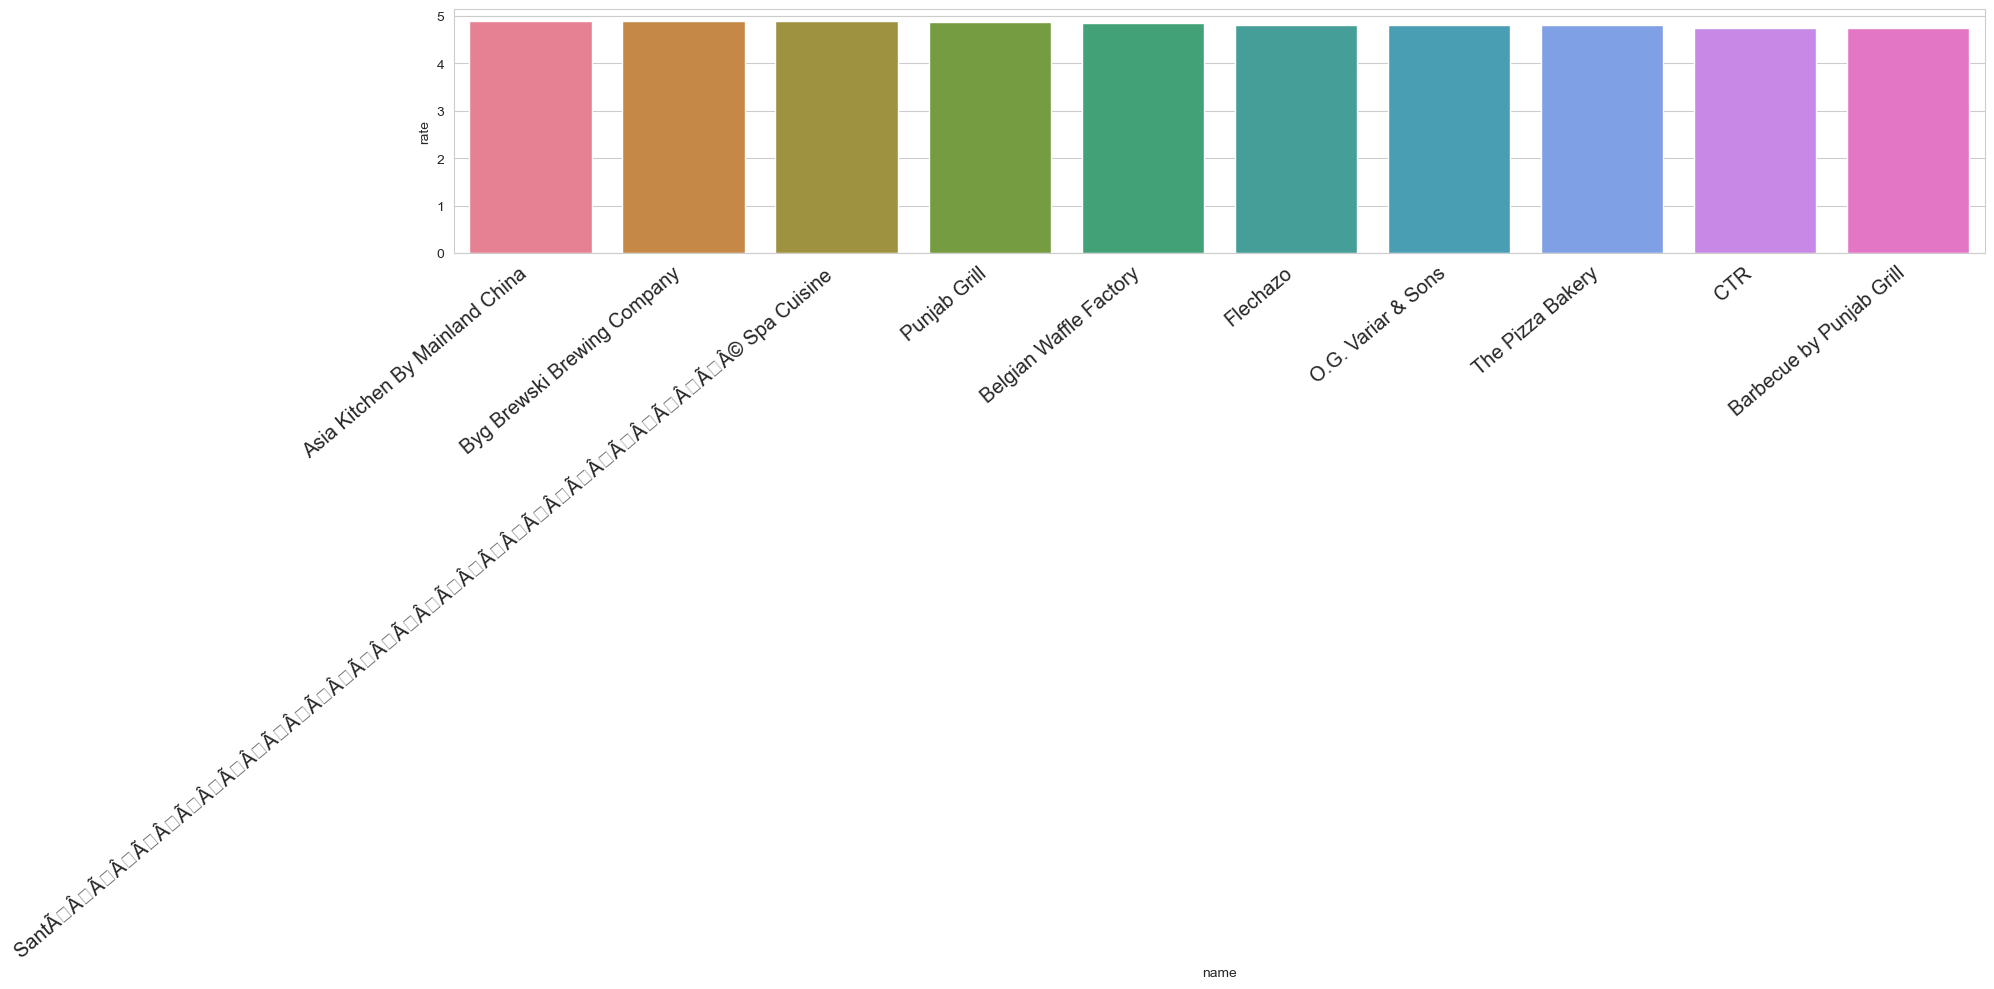

In [85]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="name",y="rate",data=high_rate,palette="husl")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

In [83]:
high_cost=df.groupby(["name"])[["approx_cost(for two people)"]].mean().sort_values(by="approx_cost(for two people)",ascending=False).head(10).reset_index()

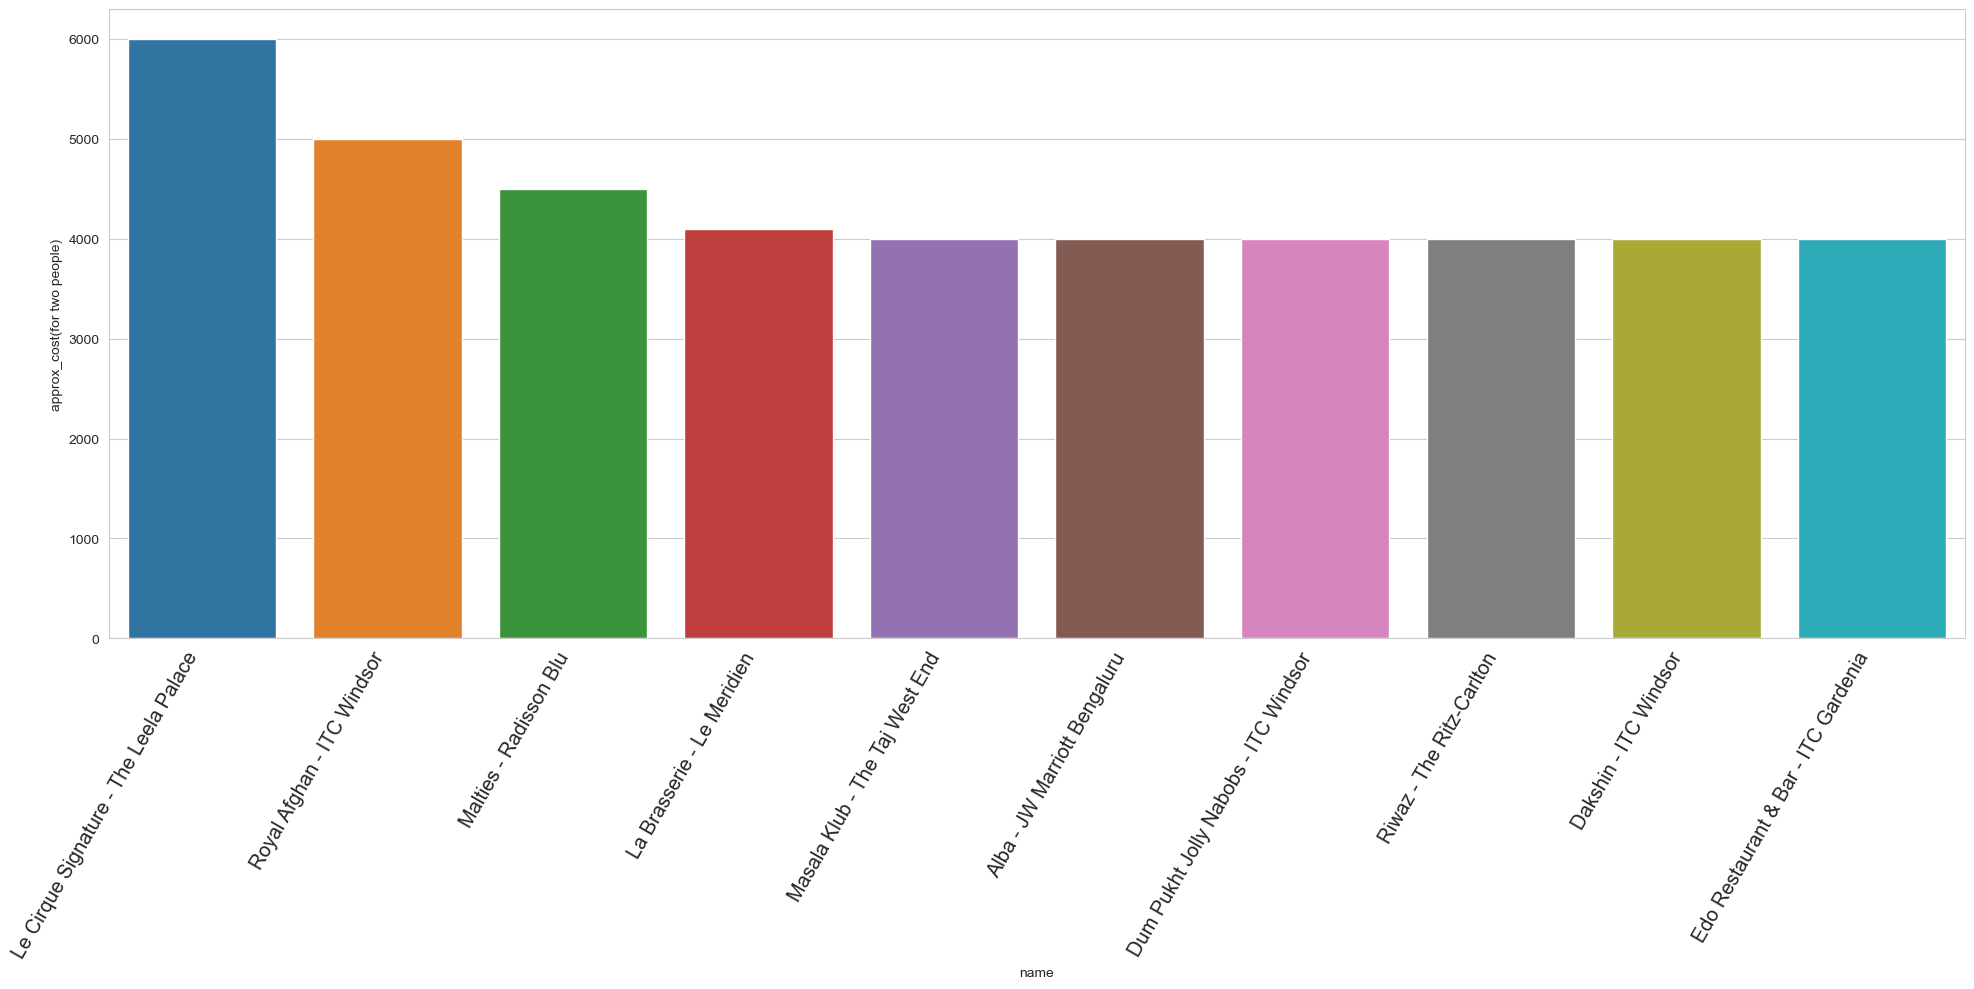

In [84]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")
sb.barplot(data=high_cost,y="approx_cost(for two people)",x="name",palette="tab10")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

In [86]:
afford_rest=df.groupby(["name"])[["approx_cost(for two people)","rate"]].mean()

In [87]:
afford_rest["approx_cost(for two people)"].mean()

497.04129940991413

In [88]:
afford=afford_rest[(afford_rest["approx_cost(for two people)"]<afford_rest["approx_cost(for two people)"].mean()) & (afford_rest["rate"]>afford_rest["rate"].mean())].head(10).reset_index()

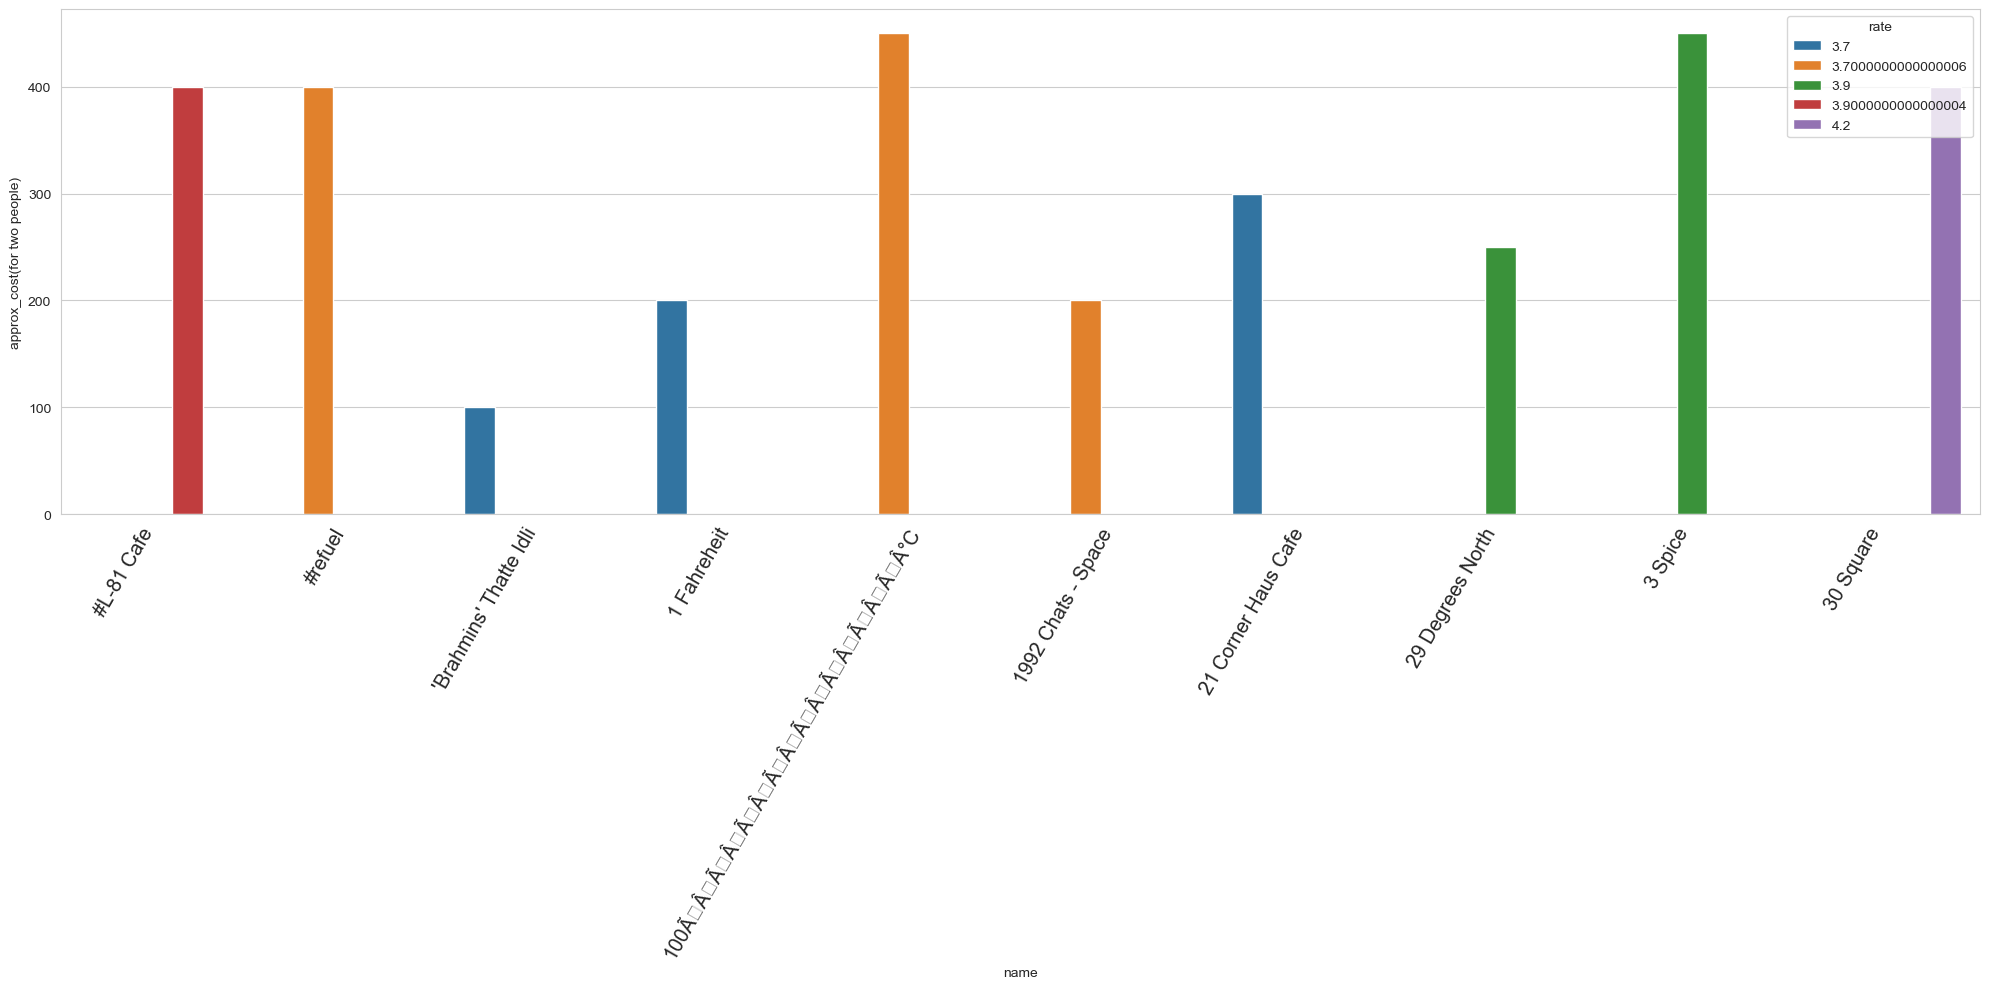

In [89]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")
sb.barplot(data=afford,y="approx_cost(for two people)",x="name",hue="rate")
plt.xticks(rotation=60,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

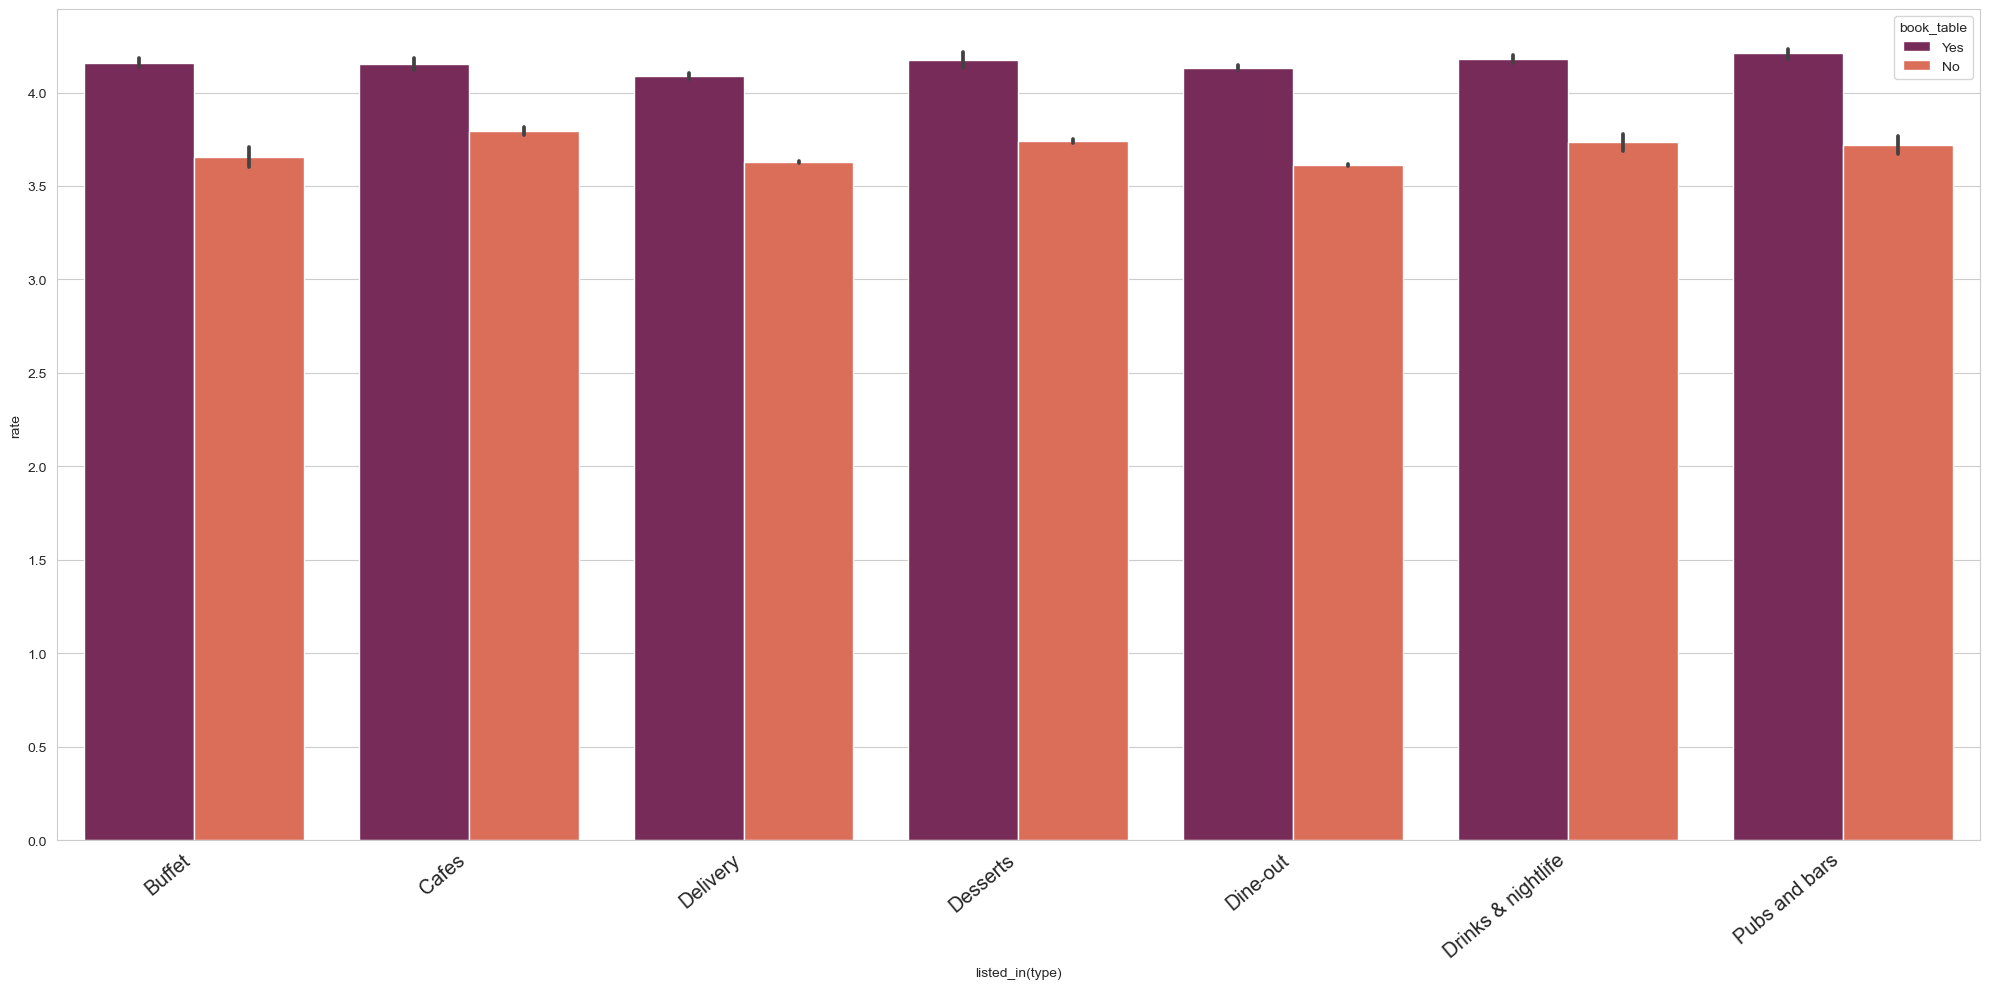

In [91]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="listed_in(type)",y="rate",data=df,hue="book_table",palette="rocket")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

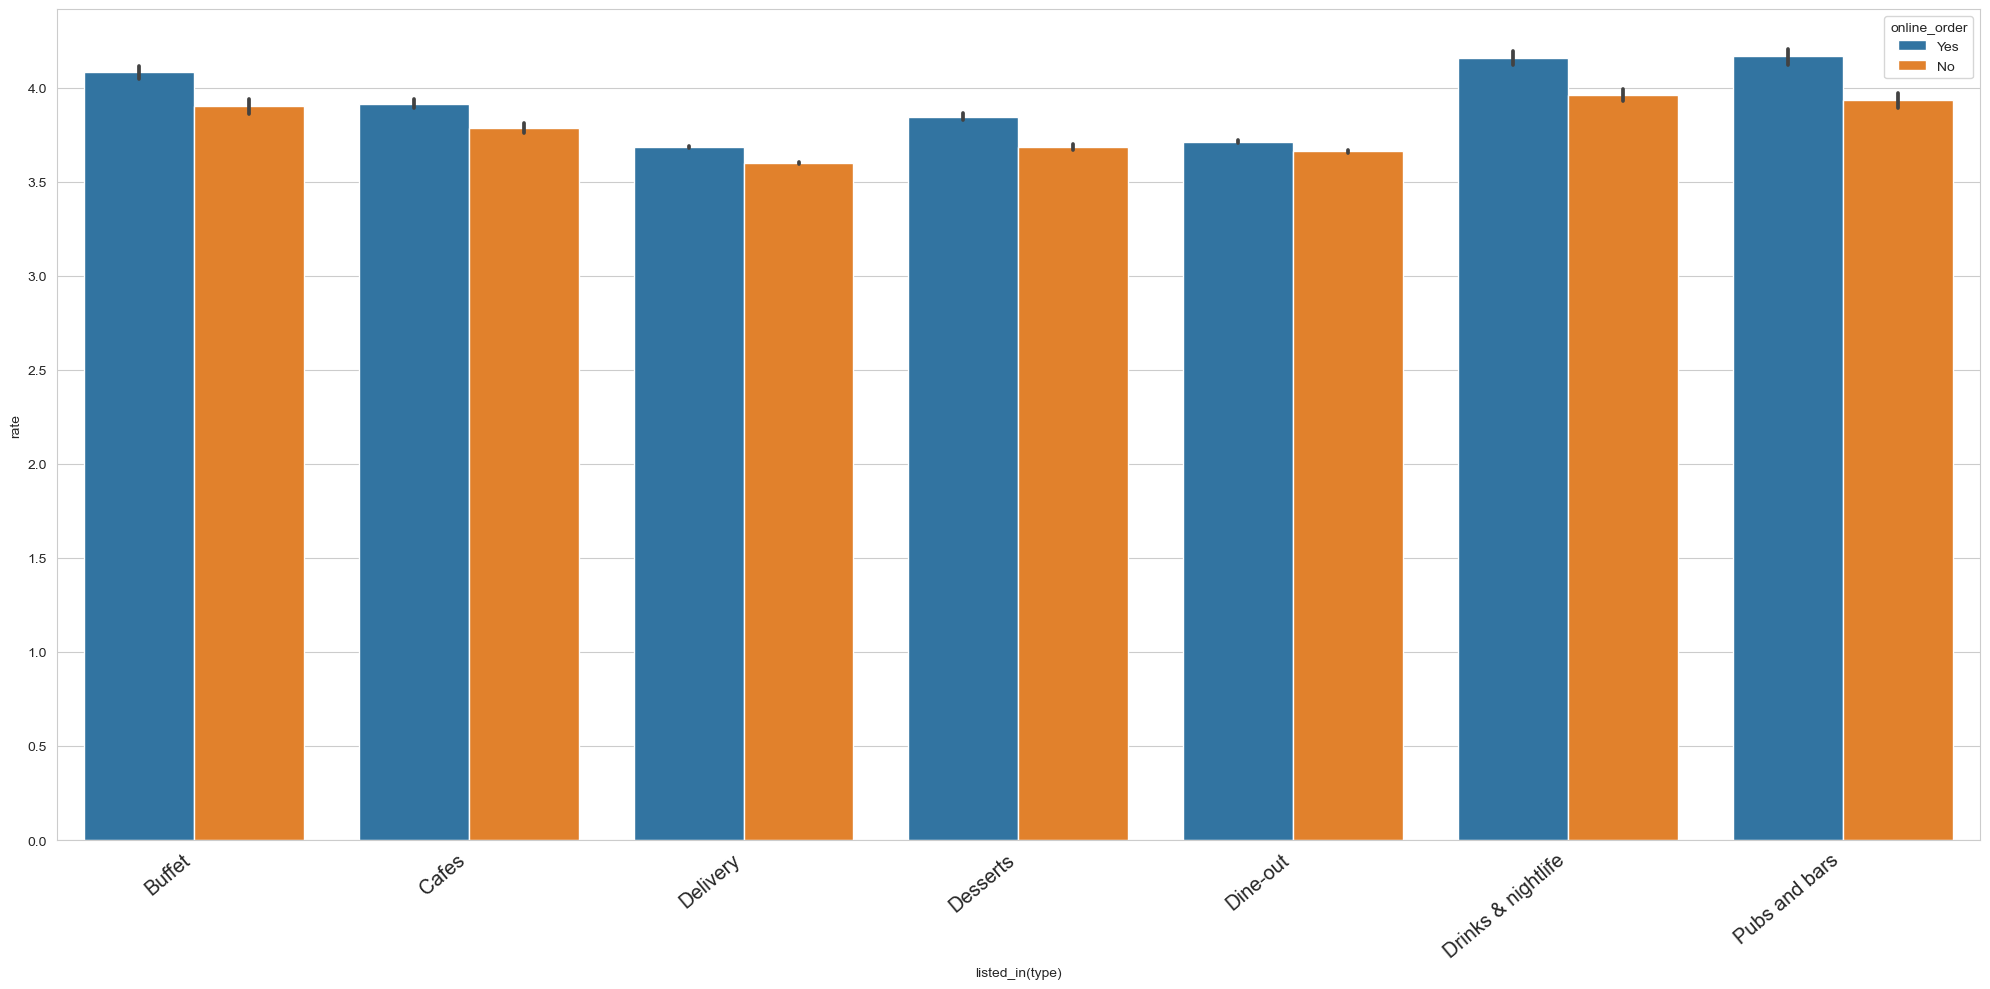

In [92]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="listed_in(type)",y="rate",data=df,hue="online_order")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

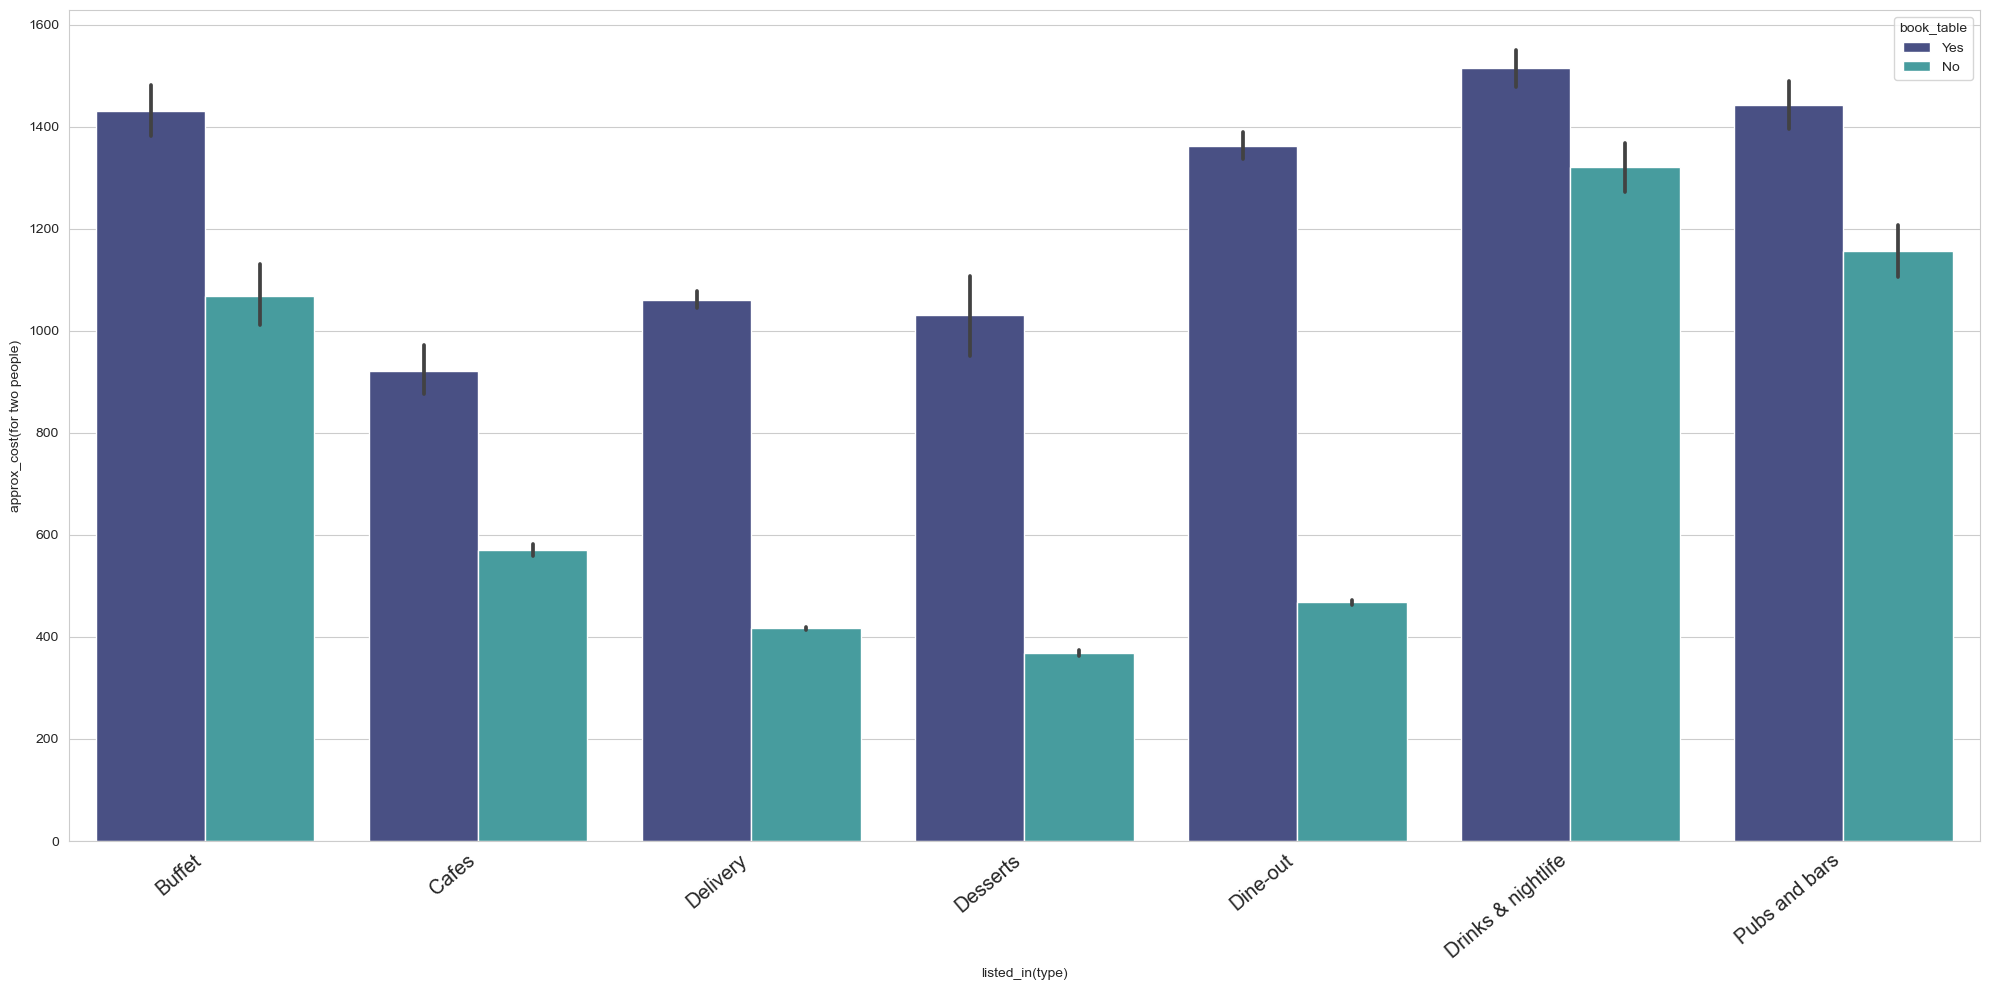

In [94]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="listed_in(type)",y="approx_cost(for two people)",data=df,hue="book_table",palette="mako")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

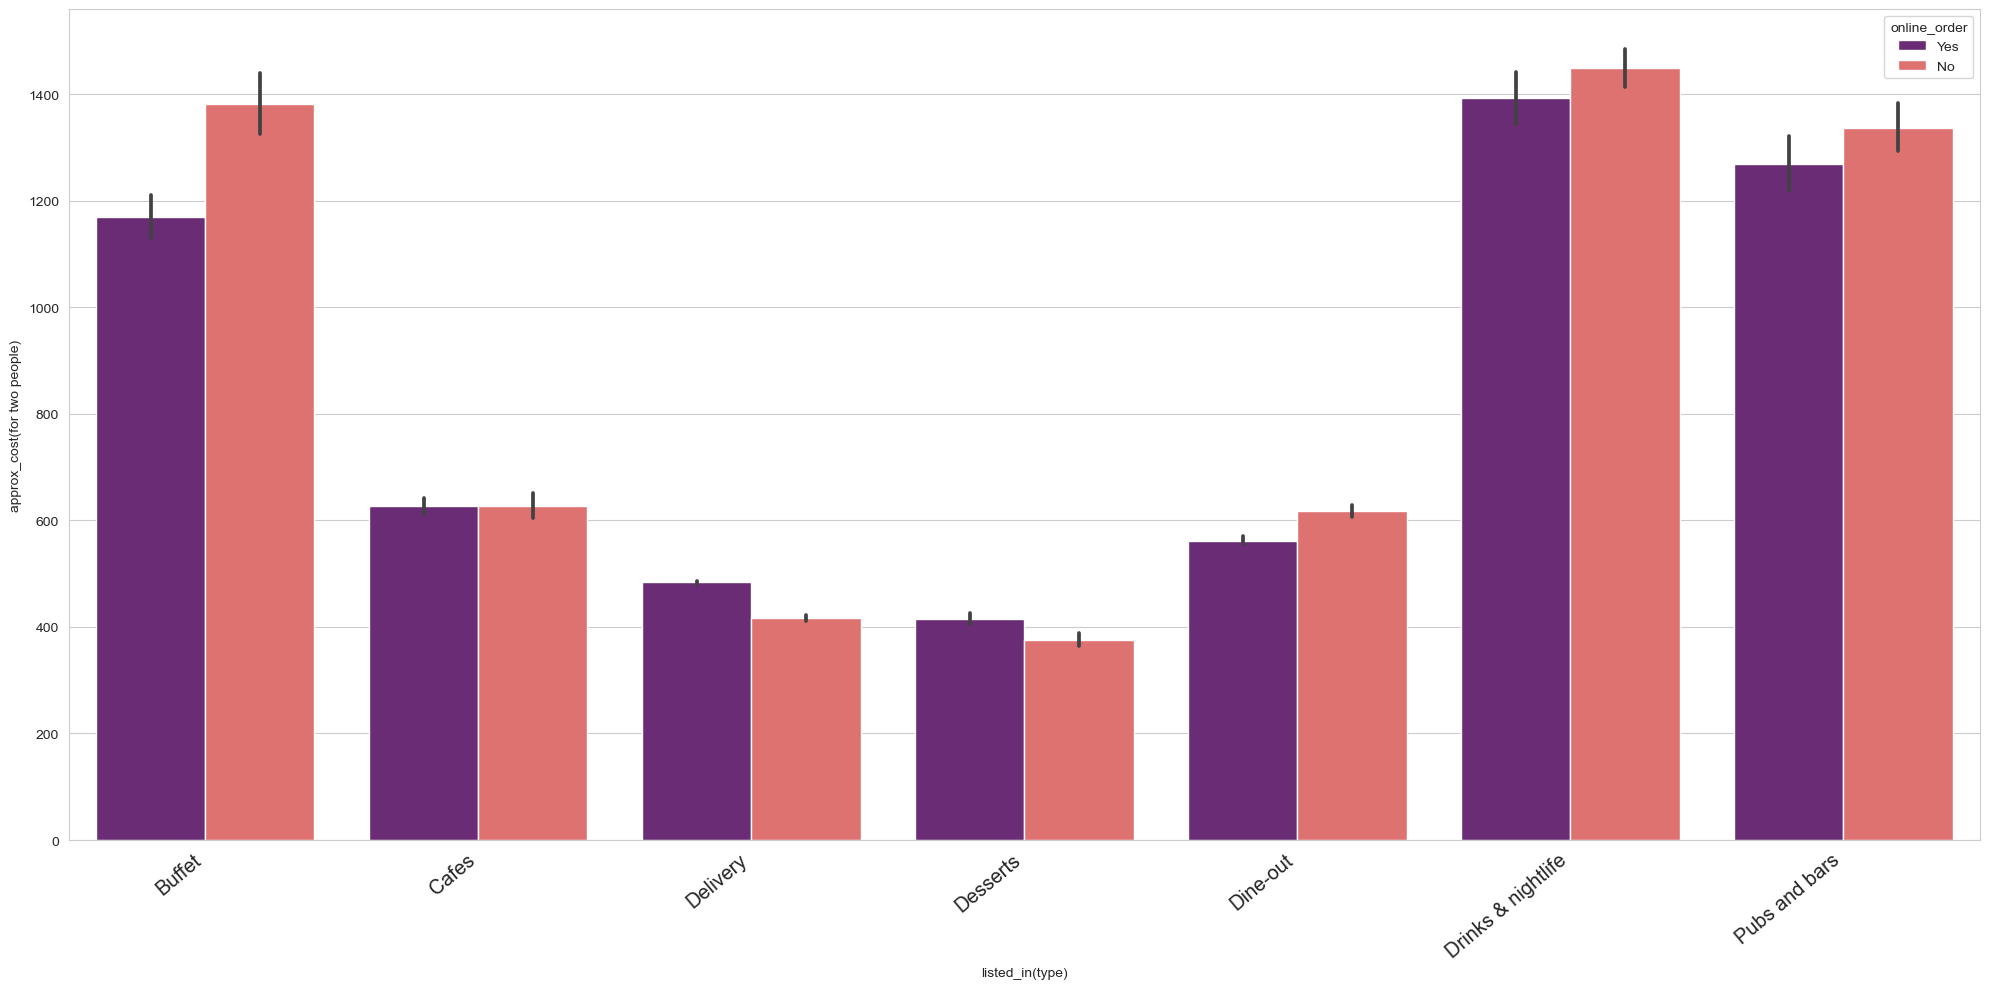

In [95]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="listed_in(type)",y="approx_cost(for two people)",data=df,hue="online_order",palette="magma")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

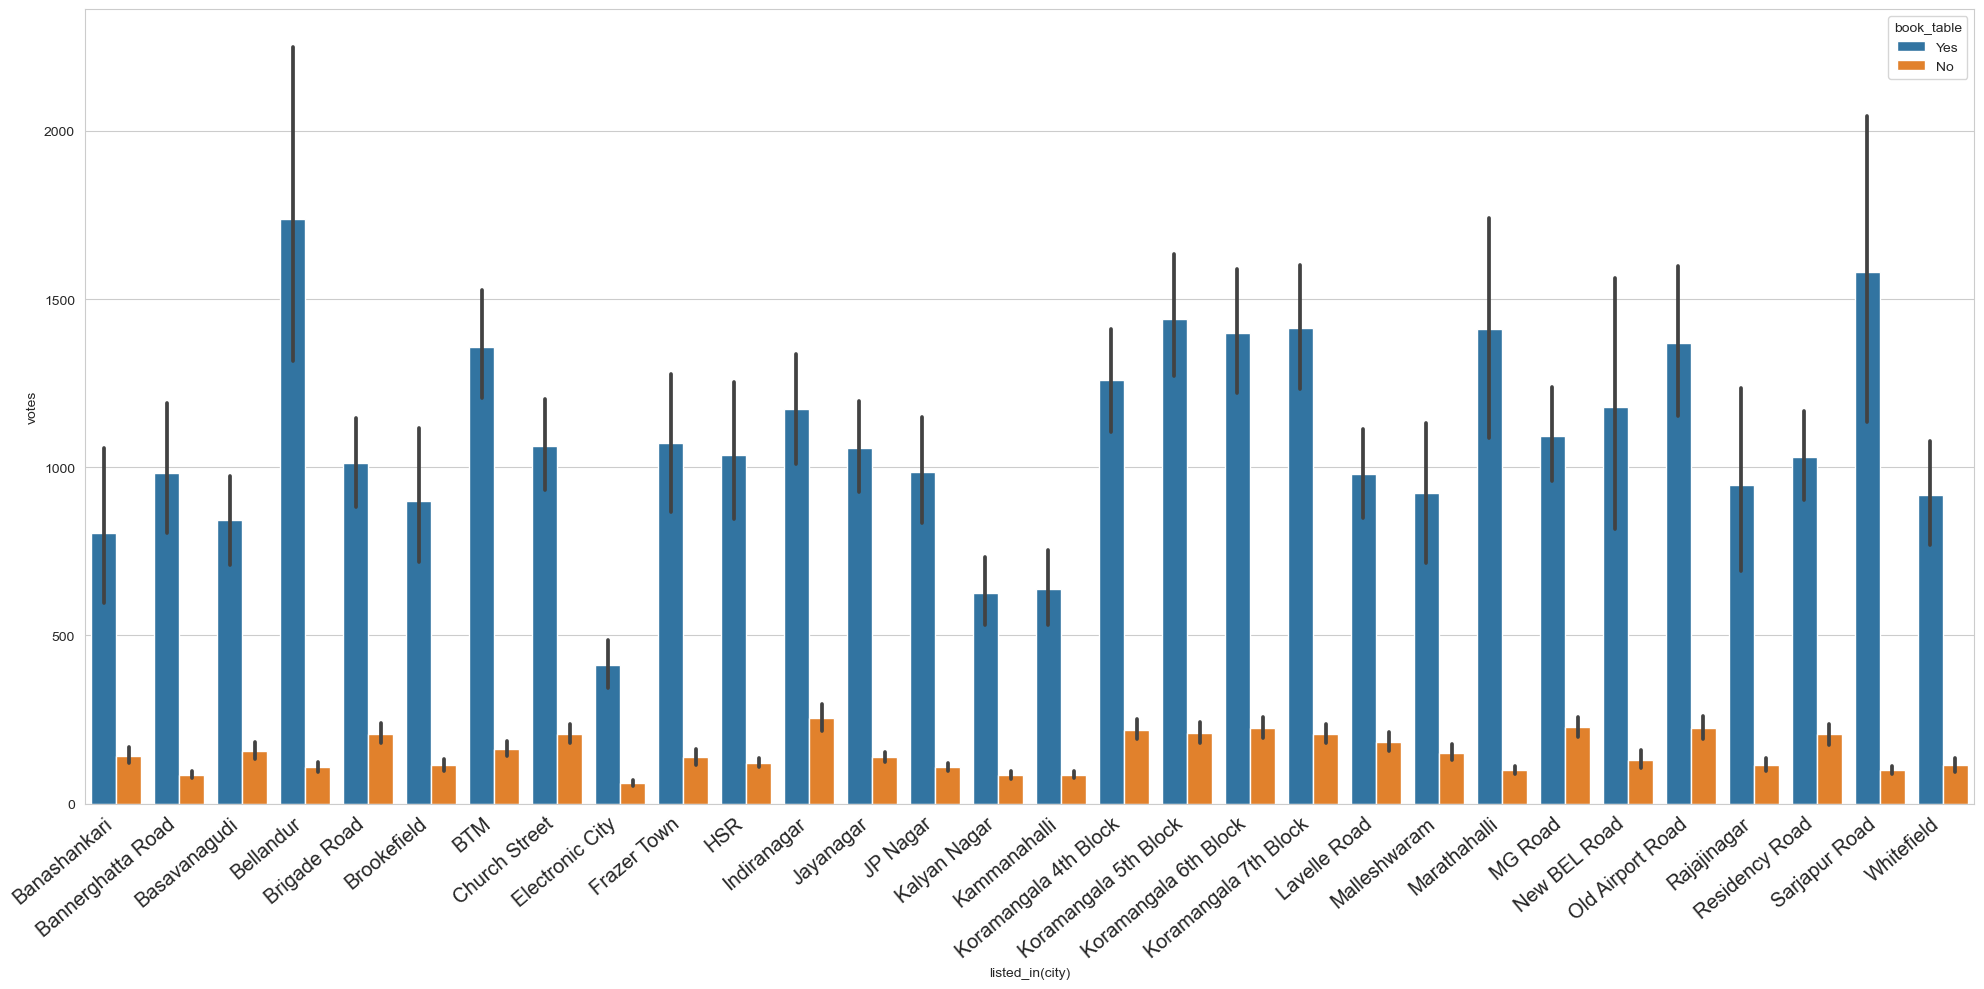

In [96]:
fig=plt.figure(figsize=(20,10))
sb.set_style(style="whitegrid")#whitegrid
sb.barplot(x="listed_in(city)",y="votes",data=df,hue="book_table")
plt.xticks(rotation=40,horizontalalignment="right",fontsize="x-large")
plt.tight_layout()
plt.show()

In [97]:
types=df.groupby("listed_in(type)")["rate"].mean().reset_index()

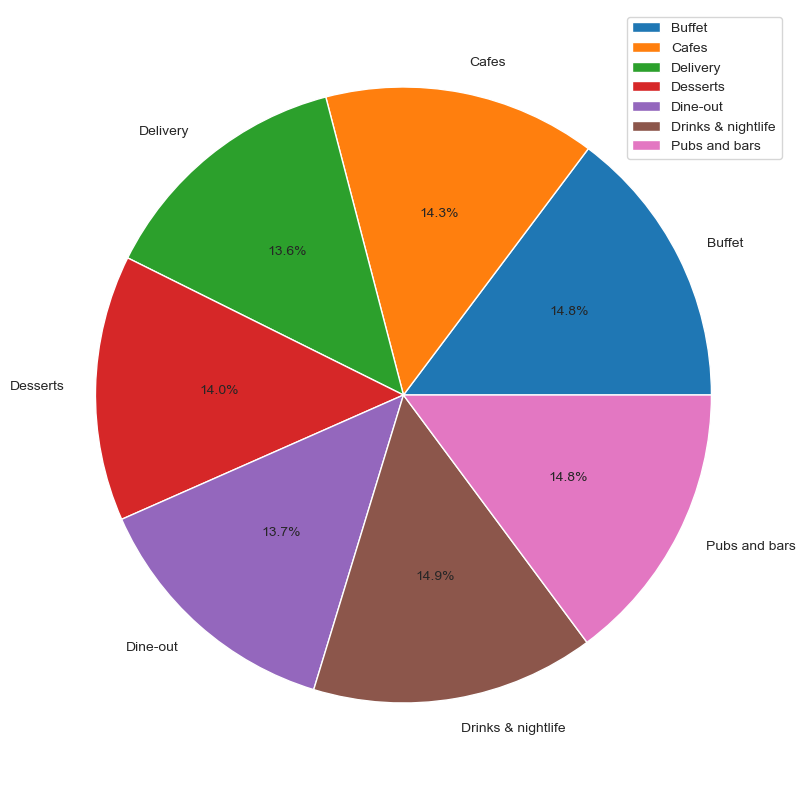

In [103]:
fig=plt.figure(figsize=(10,10))
per_types=pd.Series(types["listed_in(type)"])
per_rate=pd.Series(types["rate"])
plt.pie(per_rate,labels=per_types,autopct="%1.1f%%")
plt.legend()
plt.show()

In [114]:
city=df.groupby("listed_in(city)")["approx_cost(for two people)"].mean().reset_index()

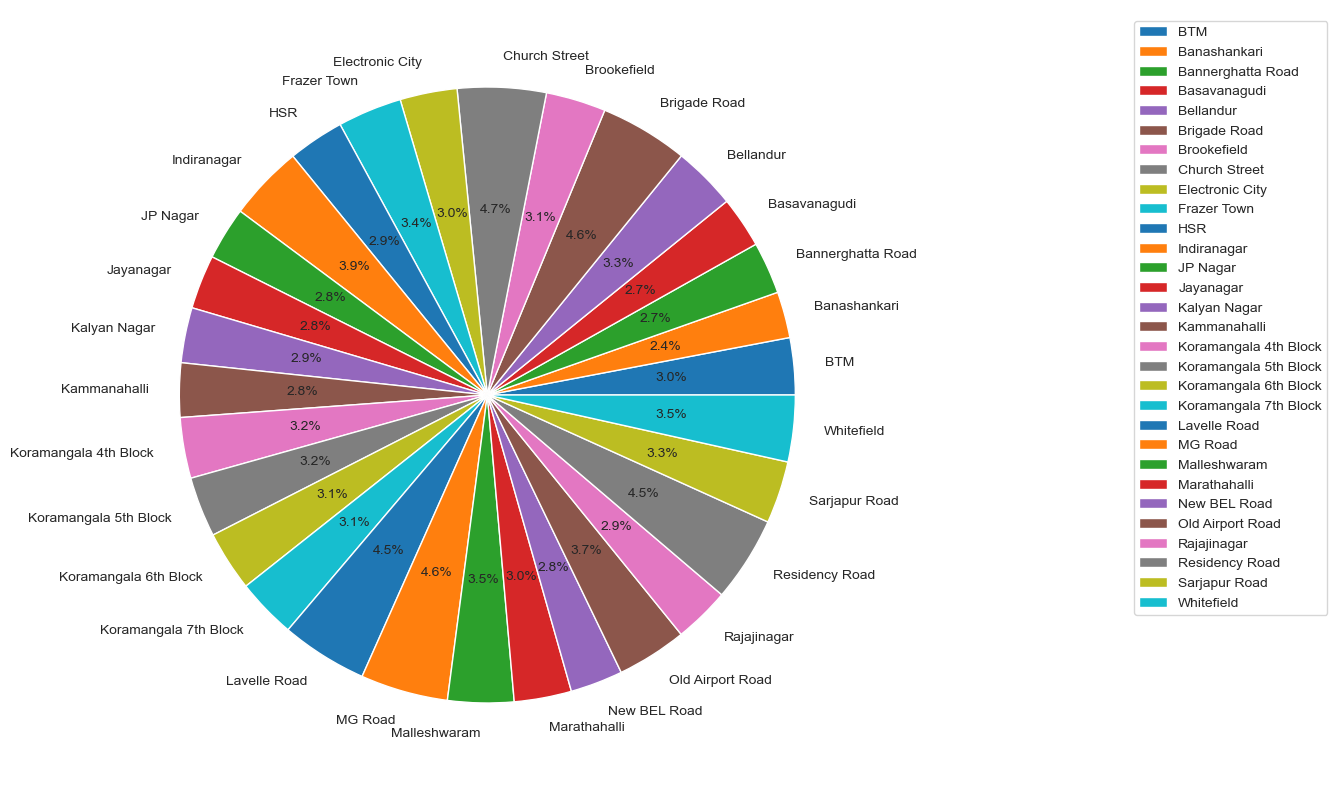

In [115]:
fig=plt.figure(figsize=(10,10))
per_city=pd.Series(city["listed_in(city)"])
per_rate=pd.Series(city["approx_cost(for two people)"])
plt.pie(per_rate,labels=per_city,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1.6, 0.6),loc='center right')
plt.show()

In [116]:
city=df.groupby("listed_in(type)")["approx_cost(for two people)"].mean().reset_index()

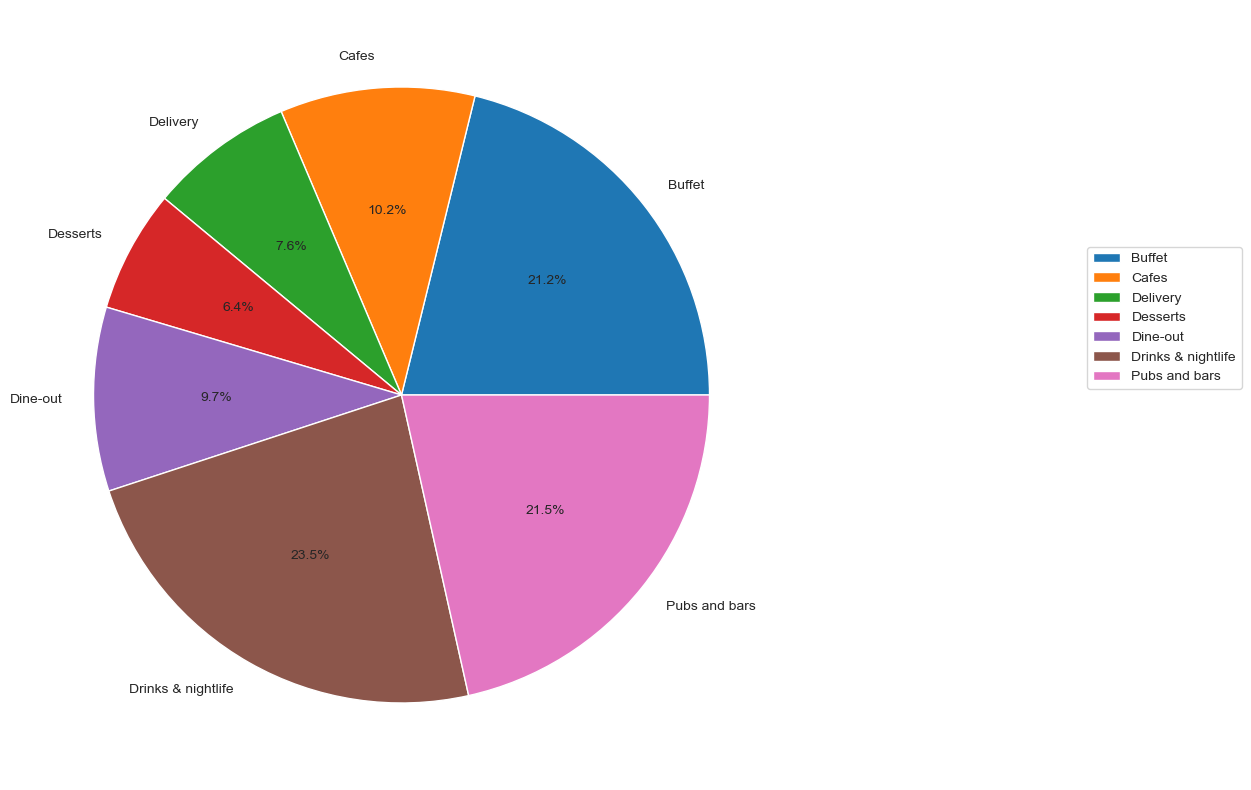

In [117]:
fig=plt.figure(figsize=(20,10))
per_city=pd.Series(city["listed_in(type)"])
per_rate=pd.Series(city["approx_cost(for two people)"])
plt.pie(per_rate,labels=per_city,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1.6, 0.6),loc='center right')
plt.show()